# Iris Species

Classify iris plants into three species in this classic dataset

# About Dataset

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

Id

SepalLengthCm

SepalWidthCm

PetalLengthCm

PetalWidthCm

Species

<a href="https://www.kaggle.com/datasets/uciml/iris"> Kaggle Link </a>

# Packages

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data

In [126]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Type of species

In [127]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Dataset is balanced

In [128]:
df['Species'].value_counts(normalize=True)

Species
Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: proportion, dtype: float64

# No NaN values

In [129]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# No duplicate value

In [130]:
df.duplicated().sum()

0

# dataset information

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# descriptive statistics

In [132]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Some Exploratory Data Analysis

In [133]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Text(0, 0.5, 'Number of species')

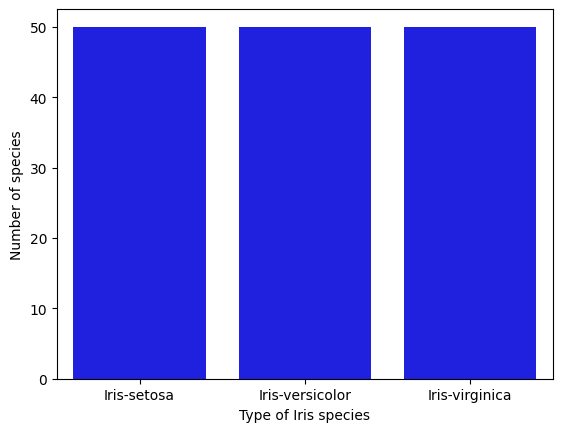

In [134]:
sns.countplot(x='Species', data=df, color='blue')
plt.xlabel("Type of Iris species")
plt.ylabel("Number of species")

<Axes: xlabel='SepalLengthCm'>

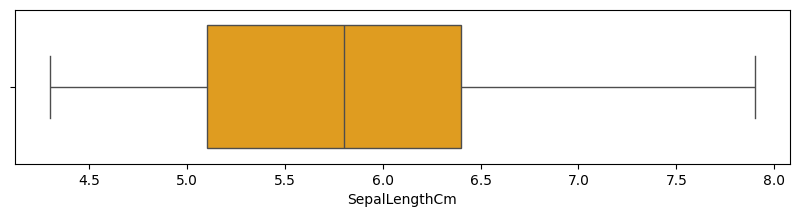

In [135]:
plt.figure(figsize=(10,2))
sns.boxplot(x = 'SepalLengthCm', data=df, color='orange')

<Axes: xlabel='SepalWidthCm'>

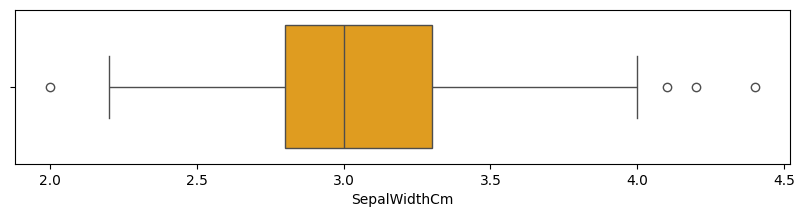

In [136]:
plt.figure(figsize=(10,2))
sns.boxplot(x = 'SepalWidthCm', data=df, color='orange')

<Axes: xlabel='PetalLengthCm'>

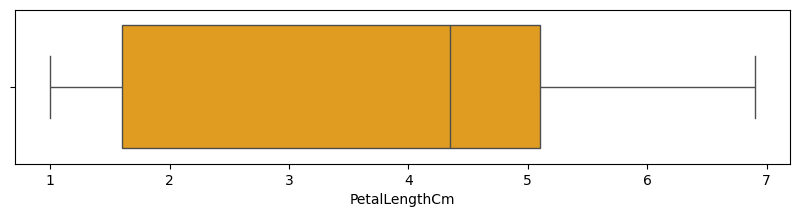

In [137]:
plt.figure(figsize=(10,2))
sns.boxplot(x = 'PetalLengthCm', data=df, color='orange')

<Axes: xlabel='PetalWidthCm'>

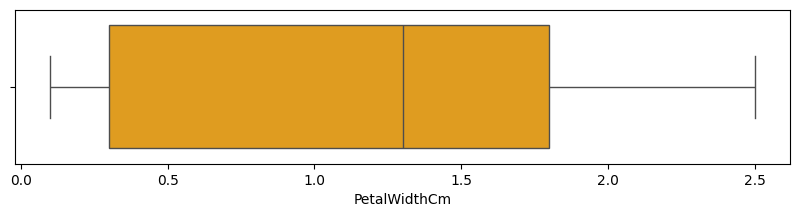

In [138]:
plt.figure(figsize=(10,2))
sns.boxplot(x = 'PetalWidthCm', data=df, color='orange')

<Axes: xlabel='SepalWidthCm', ylabel='Count'>

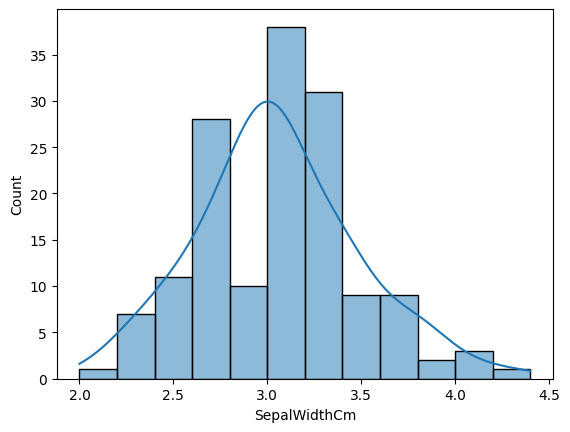

In [139]:
sns.histplot(x = 'SepalWidthCm', data=df, binwidth=0.2, kde=True)

# Removal of outliers

Since number of data point is less, a nornal distribution approach may not be good

In [140]:
from scipy.stats import zscore

In [141]:
df['sepWidZscore'] = zscore(df['SepalWidthCm'])

In [142]:
df[df['sepWidZscore']>3]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,sepWidZscore
15,16,5.7,4.4,1.5,0.4,Iris-setosa,3.114684


In [143]:
df[df['sepWidZscore']<-3]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,sepWidZscore


In [144]:
q1 = df['SepalWidthCm'].quantile(0.25)
q3 = df['SepalWidthCm'].quantile(.75)

iqr = q3-q1

min_value = q1 - (1.5*iqr)
max_value = q3 + (1.5*iqr)

In [145]:
df[df['SepalWidthCm']>max_value]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,sepWidZscore
15,16,5.7,4.4,1.5,0.4,Iris-setosa,3.114684
32,33,5.2,4.1,1.5,0.1,Iris-setosa,2.420475
33,34,5.5,4.2,1.4,0.2,Iris-setosa,2.651878


In [146]:
df[df['SepalWidthCm']<min_value]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,sepWidZscore
60,61,5.0,2.0,3.5,1.0,Iris-versicolor,-2.438987


In [147]:
df = df[df['SepalWidthCm']<=max_value]

In [148]:
df = df[df['SepalWidthCm']>=min_value]

<Axes: xlabel='SepalWidthCm'>

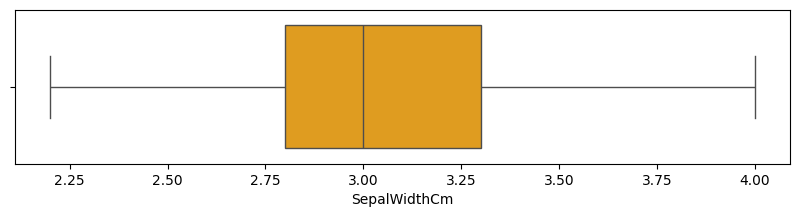

In [149]:
plt.figure(figsize=(10,2))
sns.boxplot(x = 'SepalWidthCm', data=df, color='orange')

In [150]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,sepWidZscore
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1.032057
1,2,4.9,3.0,1.4,0.2,Iris-setosa,-0.124958
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0.337848
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0.106445
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1.263460


# Feature selection

In [151]:
df = df.drop(columns=['Id', 'sepWidZscore'], axis = 1)

In [152]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Feature engineering

In [153]:
df['Species'] = df['Species'].map(
    {
        'Iris-setosa' : 0,
        'Iris-versicolor' : 1,
        'Iris-virginica' : 2
    }
)

In [154]:
df['Species'].value_counts()

Species
2    50
1    49
0    47
Name: count, dtype: int64

# Statistical models

In [155]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [156]:
s0 = df[df['Species']==0]

In [157]:
s0.shape[0]

47

In [158]:
s0_actual_mean_sepWidth = s0['SepalWidthCm'].mean()
s0_actual_mean_sepWidth

3.365957446808511

In [159]:
s0_sampled = df.sample(n= 30, replace=True)

In [160]:
s0_sampled['SepalWidthCm'].mean()

2.933333333333333

In [161]:
import scipy as sp

In [162]:
s0_sample_mean_sepWidth = s0_sampled['SepalWidthCm'].mean()
s0_sample_stderr_sepWidth = s0_sampled['SepalWidthCm'].std()/(np.sqrt(len(s0_sampled)))
sp.stats.norm.interval(0.95, s0_sample_mean_sepWidth, s0_sample_stderr_sepWidth)

(2.8078402684191994, 3.058826398247467)

# Hypothesis testing

In [163]:
s0_sampled = df[df['Species']==0].sample(n=30, replace=True)['SepalWidthCm']
s1_sampled = df[df['Species']==1].sample(n=30, replace=True)['SepalWidthCm']

In [164]:
s0_sampled.mean(), s1_sampled.mean()

(3.32, 2.873333333333334)

H0 --> there is no diff in means of these two species. the diff shows occurs by chance

H1 --> the mean diff is statistically significant

In [165]:
sp.stats.ttest_ind(a=s0_sampled, b=s1_sampled, equal_var=False)

TtestResult(statistic=6.021803466706908, pvalue=1.2636320160265827e-07, df=57.86716875873415)

Reject the null hypothesis. The diff is statistically significant

# Machine learning models

# Cluster --> Unsupervised ML model

In [166]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [167]:
cluster_df = df.copy()
cluster_df = cluster_df.drop(columns=['Species'], axis = 1)

In [168]:
cluster_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [169]:
cluster_df = MinMaxScaler().fit_transform(cluster_df)

In [170]:
n_clust = np.arange(2,11,1)
intertia = []
sil_score = []

for n in n_clust:
    kmeans_instance = KMeans(n_clusters=n).fit(cluster_df)
    intertia.append(kmeans_instance.inertia_)
    sil_score.append(silhouette_score(cluster_df, kmeans_instance.labels_))

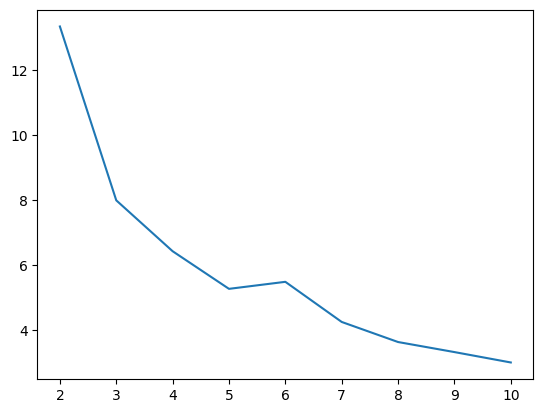

In [171]:
plt.plot(n_clust, intertia)

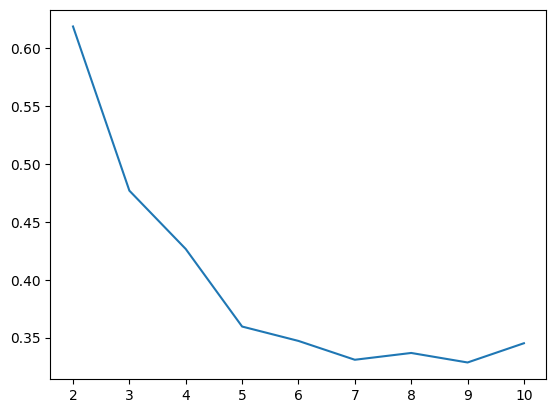

In [172]:
plt.plot(n_clust, sil_score)

# Linear regression

In [173]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


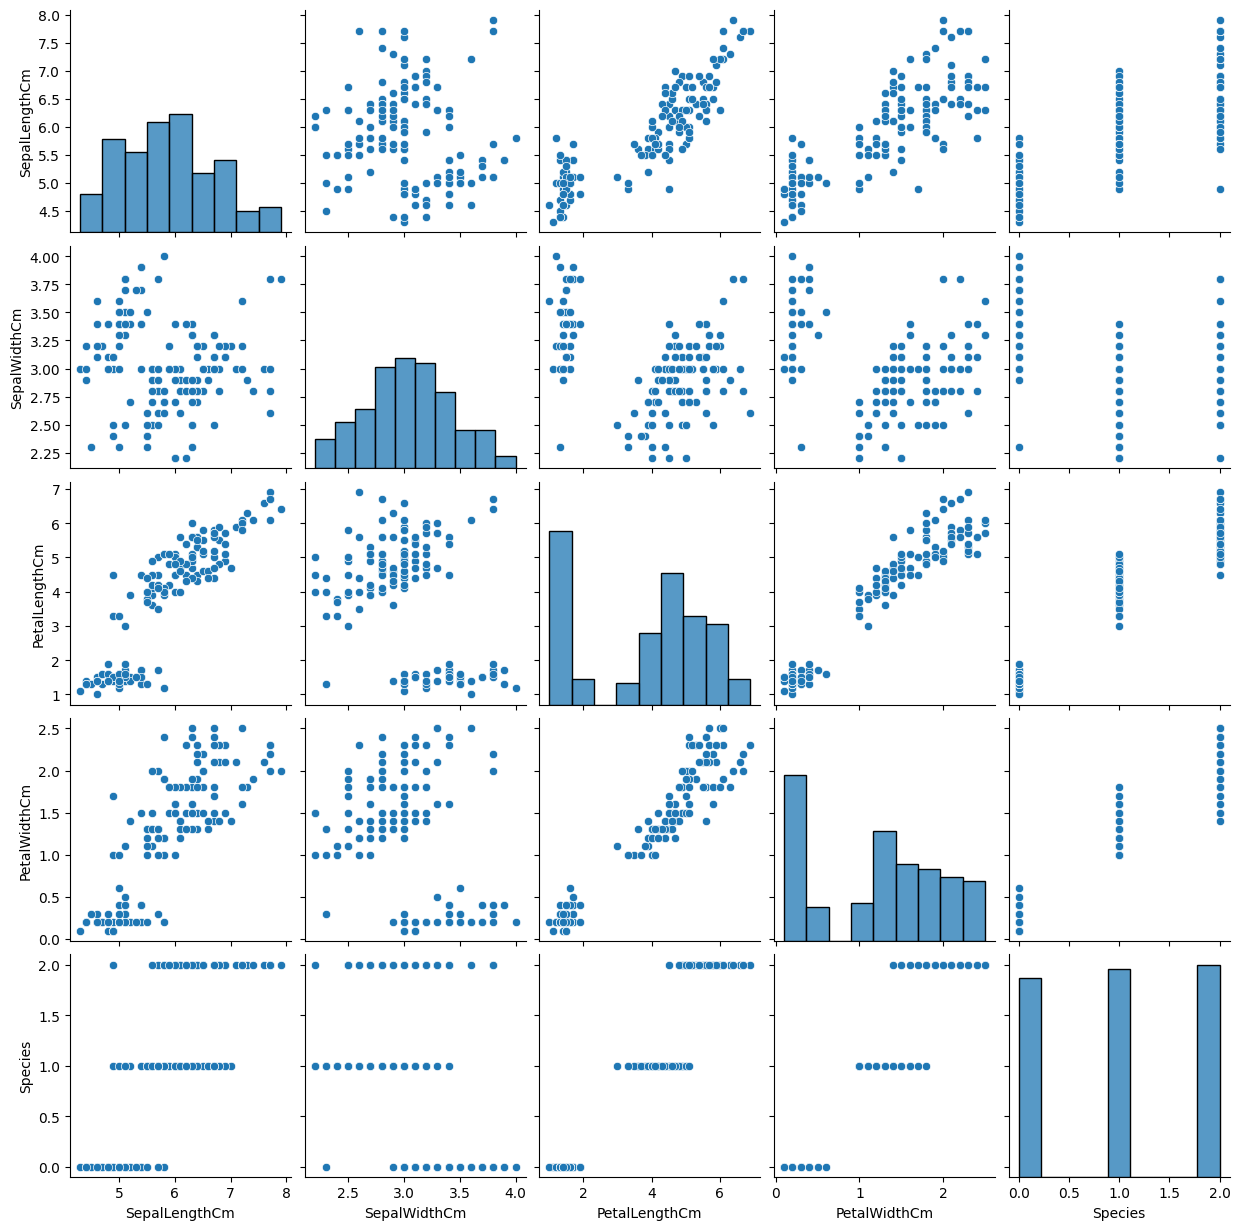

In [174]:
sns.pairplot(df)

how sepal length is dependent on petal length

In [175]:
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from statsmodels.api import qqplot

In [176]:
X = df['PetalLengthCm']
y = df['SepalLengthCm']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [177]:
ols_data = pd.concat([X_train, y_train], axis = 1)
ols_formula = 'SepalLengthCm ~ PetalLengthCm'

In [178]:
model = ols(formula=ols_formula, data=ols_data).fit()

In [179]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          SepalLengthCm   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     420.5
Date:                Tue, 13 Aug 2024   Prob (F-statistic):           1.33e-37
Time:                        21:32:21   Log-Likelihood:                -41.376
No. Observations:                 102   AIC:                             86.75
Df Residuals:                     100   BIC:                             92.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.2902      0.084     51.085

In [180]:
y_pred = model.predict(X_test)

<Axes: xlabel='PetalLengthCm', ylabel='SepalLengthCm'>

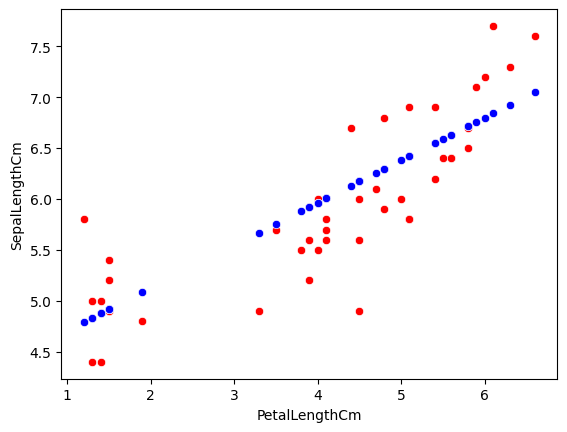

In [181]:
sns.scatterplot(x = df['PetalLengthCm'],y = y_test, color='red')
sns.scatterplot(x = X_test,y = y_pred, color='blue')

<Axes: xlabel='PetalLengthCm', ylabel='SepalLengthCm'>

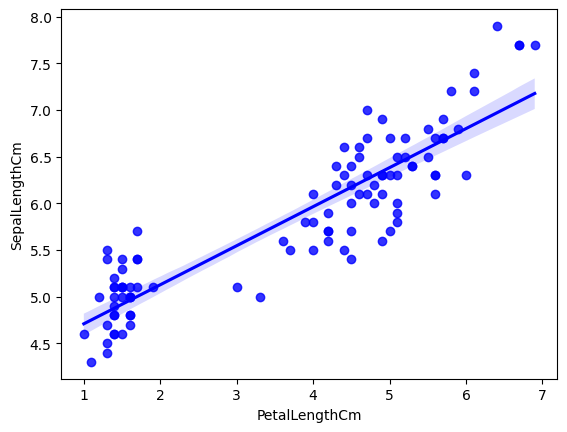

In [182]:
sns.regplot(x = 'PetalLengthCm', y = 'SepalLengthCm', data=ols_data, color='blue')

how sepal length is affected by other three numerical columns

In [183]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [184]:
X = df.copy()
X = X.drop(columns=['SepalLengthCm'], axis = 1)
y = df['SepalLengthCm']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [185]:
ols_data = pd.concat([X_train, y_train], axis = 1)
ols_formula = 'SepalLengthCm ~ SepalWidthCm + PetalLengthCm + PetalWidthCm + C(Species)'

In [186]:
model = ols(formula=ols_formula, data=ols_data).fit()

In [187]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          SepalLengthCm   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     132.9
Date:                Tue, 13 Aug 2024   Prob (F-statistic):           1.54e-41
Time:                        21:32:22   Log-Likelihood:                -20.925
No. Observations:                 102   AIC:                             53.85
Df Residuals:                      96   BIC:                             69.60
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.9288      0.371     

In [191]:
y_pred = model.predict(X_test)

<Axes: ylabel='Count'>

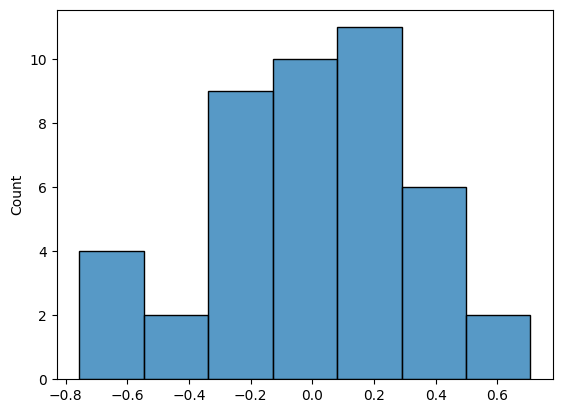

In [192]:
residue = y_test - y_pred
sns.histplot(residue)

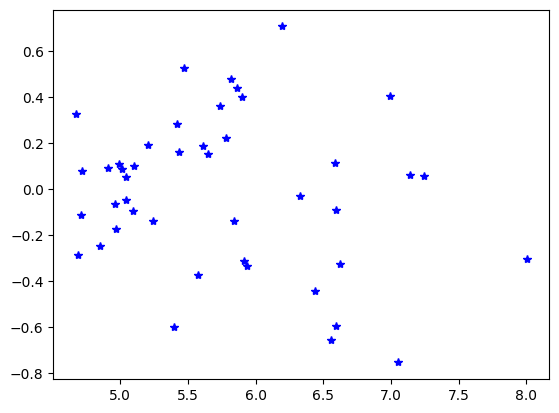

In [194]:
plt.plot(y_pred, residue, "b*")

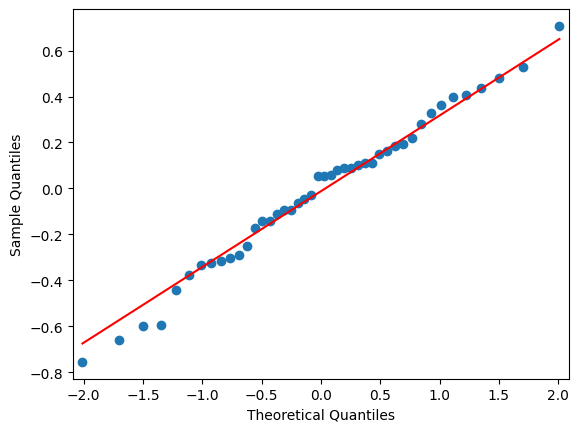

In [197]:
qqplot(residue, line='s')
plt.plot();

# Binary logistic regression

In [198]:
df = df[df['Species'] != 2]

In [200]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [201]:
X = df.copy()
X = X.drop(columns=['Species'], axis = 1)
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [202]:
clf = LogisticRegression().fit(X_train, y_train)

In [203]:
clf.intercept_, clf.coef_

(array([-6.76101828]),
 array([[ 0.47271045, -0.72362481,  2.12096395,  0.90438309]]))

In [204]:
y_pred = clf.predict(X_test)

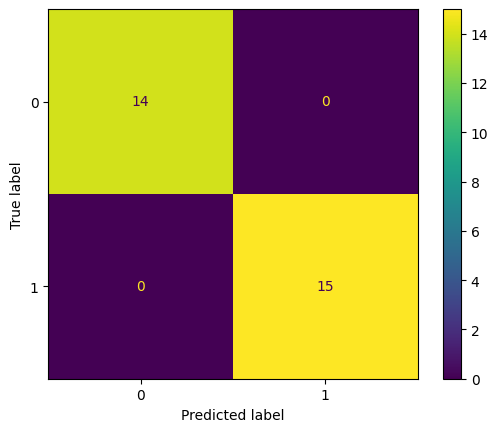

In [205]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_).plot()

In [208]:
print("Precision score: " + str(precision_score(y_test, y_pred)))
print("Accuracy score: " + str(accuracy_score(y_test, y_pred)))
print("Recall score: " + str(recall_score(y_test, y_pred)))
print("F1 score: " + str(f1_score(y_test, y_pred)))

Precision score: 1.0
Accuracy score: 1.0
Recall score: 1.0
F1 score: 1.0


# Gaussian Naive Bayes

In [209]:
X = df.copy()
X = X.drop(columns=['Species'], axis = 1)
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [210]:
X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

In [211]:
from sklearn.naive_bayes import GaussianNB

In [212]:
gnb = GaussianNB().fit(X_train, y_train)

In [213]:
y_pred = gnb.predict(X_test)

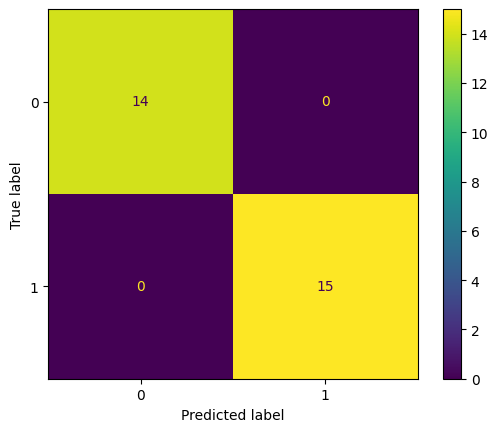

In [214]:
cm = confusion_matrix(y_test, y_pred, labels=gnb.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_).plot()

In [215]:
print("Precision score: " + str(precision_score(y_test, y_pred)))
print("Accuracy score: " + str(accuracy_score(y_test, y_pred)))
print("Recall score: " + str(recall_score(y_test, y_pred)))
print("F1 score: " + str(f1_score(y_test, y_pred)))

Precision score: 1.0
Accuracy score: 1.0
Recall score: 1.0
F1 score: 1.0


# Decision tree classifier

In [216]:
X = df.copy()
X = X.drop(columns=['Species'], axis = 1)
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [218]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [220]:
dt = DecisionTreeClassifier()
tree_params = {
    'max_depth' : [2,3,4,5,6],
    'min_samples_split' : [2,3,4],
    'min_samples_leaf' : [2,3,4,5]
}

scoring = {
    'accuracy' : 'accuracy',
    'precision' : 'precision',
    'recall' : 'recall',
    'f1' : 'f1'
}

In [221]:
%%time
cv_params = GridSearchCV(dt, tree_params, scoring=scoring, cv=5, refit='f1').fit(X_train, y_train)

CPU times: total: 1.41 s
Wall time: 3.3 s


In [222]:
import pickle

In [223]:
with open('dt_cv.pkl', 'wb') as file:
    pickle.dump(cv_params, file)

with open('dt_cv.pkl', 'rb') as file:
    cv_params = pickle.load(file)

In [224]:
cv_params.best_params_

{'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [225]:
dt = DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, min_samples_split=2).fit(X_train, y_train)

In [226]:
y_pred = dt.predict(X_test)

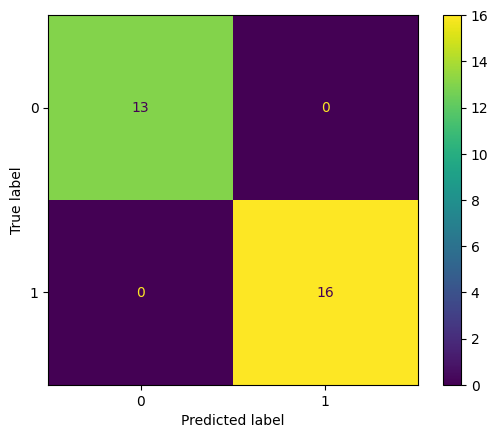

In [227]:
cm = confusion_matrix(y_test, y_pred, labels=dt.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_).plot()

In [228]:
print("Precision score: " + str(precision_score(y_test, y_pred)))
print("Accuracy score: " + str(accuracy_score(y_test, y_pred)))
print("Recall score: " + str(recall_score(y_test, y_pred)))
print("F1 score: " + str(f1_score(y_test, y_pred)))

Precision score: 1.0
Accuracy score: 1.0
Recall score: 1.0
F1 score: 1.0


# Random forest classifier

In [229]:
X = df.copy()
X = X.drop(columns=['Species'], axis = 1)
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [230]:
from sklearn.ensemble import RandomForestClassifier

In [232]:
rf = RandomForestClassifier()
rf_params = {
    'max_depth' : [2,3,4,5,6],
    'min_samples_split' : [2,3,4],
    'min_samples_leaf' : [2,3,4,5],
    'n_estimators' : [10, 20, 30],
    'max_features' : [0.1, 0.2, 0.5]
}

scoring = {
    'accuracy' : 'accuracy',
    'precision' : 'precision',
    'recall' : 'recall',
    'f1' : 'f1'
}

In [233]:
%%time
cv_params = GridSearchCV(rf, rf_params, scoring=scoring, cv=5, refit='f1').fit(X_train, y_train)

CPU times: total: 33.5 s
Wall time: 1min 14s


In [234]:
with open('rf_cv.pkl', 'wb') as file:
    pickle.dump(cv_params, file)

with open('rf_cv.pkl', 'rb') as file:
    cv_params = pickle.load(file)

In [235]:
cv_params.best_params_

{'max_depth': 2,
 'max_features': 0.1,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 10}

In [236]:
rf = RandomForestClassifier(max_depth=2, max_features=0.1, min_samples_leaf=2, min_samples_split=2, n_estimators=10).fit(X_train, y_train)

In [237]:
y_pred = rf.predict(X_test)

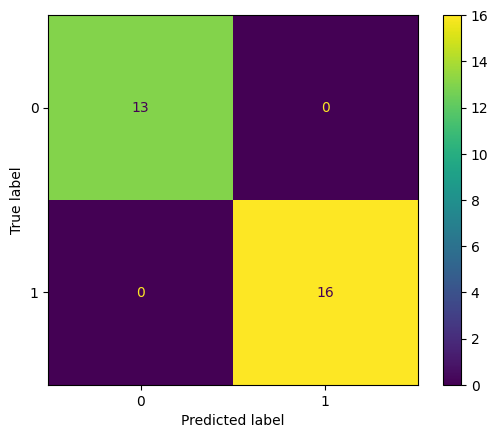

In [238]:
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_).plot()

In [239]:
print("Precision score: " + str(precision_score(y_test, y_pred)))
print("Accuracy score: " + str(accuracy_score(y_test, y_pred)))
print("Recall score: " + str(recall_score(y_test, y_pred)))
print("F1 score: " + str(f1_score(y_test, y_pred)))

Precision score: 1.0
Accuracy score: 1.0
Recall score: 1.0
F1 score: 1.0


# XGBoost

In [240]:
from xgboost import XGBClassifier

In [241]:
X = df.copy()
X = X.drop(columns=['Species'], axis = 1)
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [242]:
xgb = XGBClassifier()
xgb_params = {
    'max_depth' : [2,3,4,5,6],
    'min_samples_split' : [2,3,4],
    'min_samples_leaf' : [2,3,4,5],
    'n_estimators' : [10, 20, 30],
    'max_features' : [0.1, 0.2, 0.5],
    'learning_rate' : [0.01, 0.1, 0.2]
}

scoring = {
    'accuracy' : 'accuracy',
    'precision' : 'precision',
    'recall' : 'recall',
    'f1' : 'f1'
}

In [243]:
%%time
cv_params = GridSearchCV(xgb, xgb_params, scoring=scoring, cv=5, refit='f1').fit(X_train, y_train)

CPU times: total: 2min 43s
Wall time: 2min 33s


In [244]:
with open('xgb_cv.pkl', 'wb') as file:
    pickle.dump(cv_params, file)

with open('xgb_cv.pkl', 'rb') as file:
    cv_params = pickle.load(file)

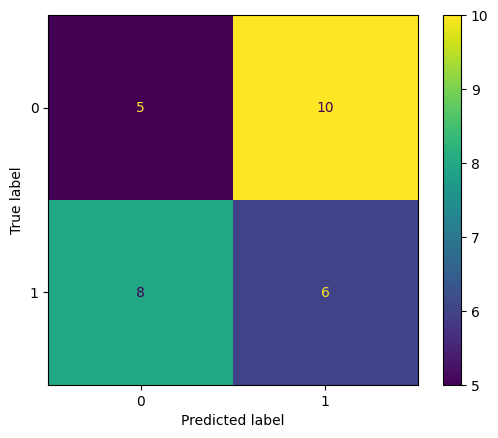

In [246]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [247]:
print("Precision score: " + str(precision_score(y_test, y_pred)))
print("Accuracy score: " + str(accuracy_score(y_test, y_pred)))
print("Recall score: " + str(recall_score(y_test, y_pred)))
print("F1 score: " + str(f1_score(y_test, y_pred)))

Precision score: 0.375
Accuracy score: 0.3793103448275862
Recall score: 0.42857142857142855
F1 score: 0.4
